In [18]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [19]:
# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [20]:
# Normalize pixel value to between 0 to 1
x_train = x_train/255.0
x_test = x_test/255.0

In [21]:
# Print shapes to confirm
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


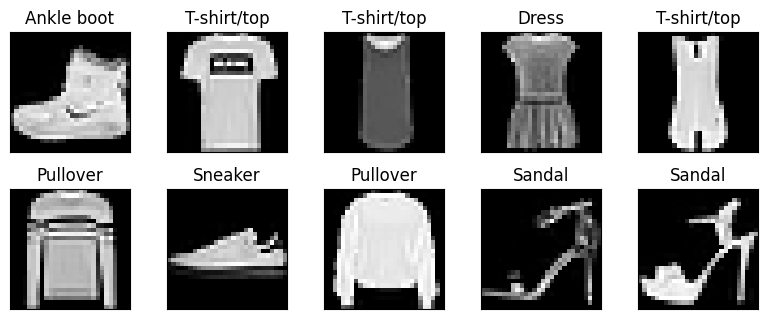

In [22]:
# List of class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8,8))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
plt.tight_layout()
plt.show()

In [23]:
# Build the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    
    keras.layers.Dense(512, activation='relu'),   # More neurons
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),                    # Slightly more dropout to prevent overfitting
    
    keras.layers.Dense(256, activation='relu'),   # Extra hidden layer
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation='softmax')  # Output layer: 10 classes
])

In [24]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [25]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.7369 - loss: 0.7538 - val_accuracy: 0.8034 - val_loss: 0.5396
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.7889 - loss: 0.5955 - val_accuracy: 0.8218 - val_loss: 0.5127
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8005 - loss: 0.5744 - val_accuracy: 0.8251 - val_loss: 0.4950
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.7994 - loss: 0.5797 - val_accuracy: 0.8237 - val_loss: 0.5025
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.7975 - loss: 0.5864 - val_accuracy: 0.8240 - val_loss: 0.5113
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.7988 - loss: 0.5748 - val_accuracy: 0.8278 - val_loss: 0.4971
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.7991 - loss: 0.5771 - val_accuracy: 0.8300 - val_loss: 0.4930
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.7947 -

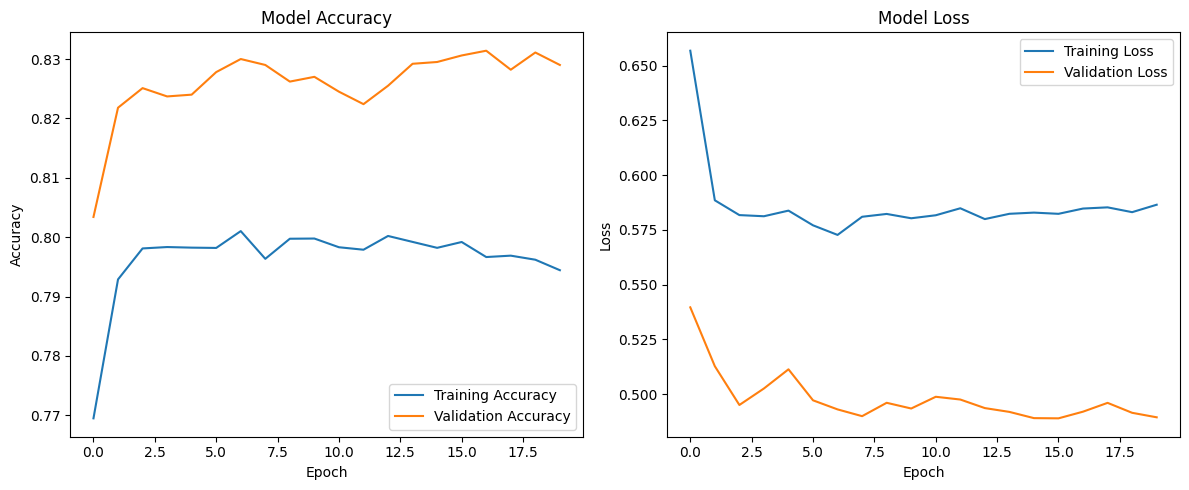

In [26]:
# Plot training & validation accuracy values
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()